In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-by-county-us/output.csv
/kaggle/input/unemployment-by-county-us/result.json


In [28]:
# import modules and libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###### Basic Inspection

In [29]:
# import data files as pandas dataframe

df = pd.read_csv('/kaggle/input/unemployment-by-county-us/output.csv') # read data

In [30]:
# check dimensionality

df.shape

(885548, 5)

In [31]:
# inspect columns
df.head(3)

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9


In [32]:
# inspect dataframe characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Year    885548 non-null  int64  
 1   Month   885548 non-null  object 
 2   State   885548 non-null  object 
 3   County  885548 non-null  object 
 4   Rate    885548 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


In [33]:
# statistical summary
df['Rate'].describe()

count    885548.000000
mean          6.175010
std           3.112535
min           0.000000
25%           4.000000
50%           5.500000
75%           7.700000
max          58.400000
Name: Rate, dtype: float64

### Data Exploration

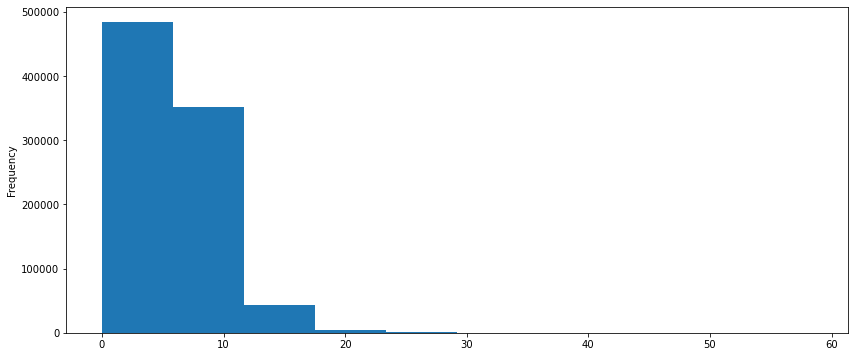

In [34]:
# Visualise distribution of the Rate column
df['Rate'].plot(kind='hist', figsize=(14,6))

The Unemployment rate in all featured states over the years exhibited hovers between 0 and 20

Text(0.5, 1.0, 'Statistical Distribution of Unemployment Data')

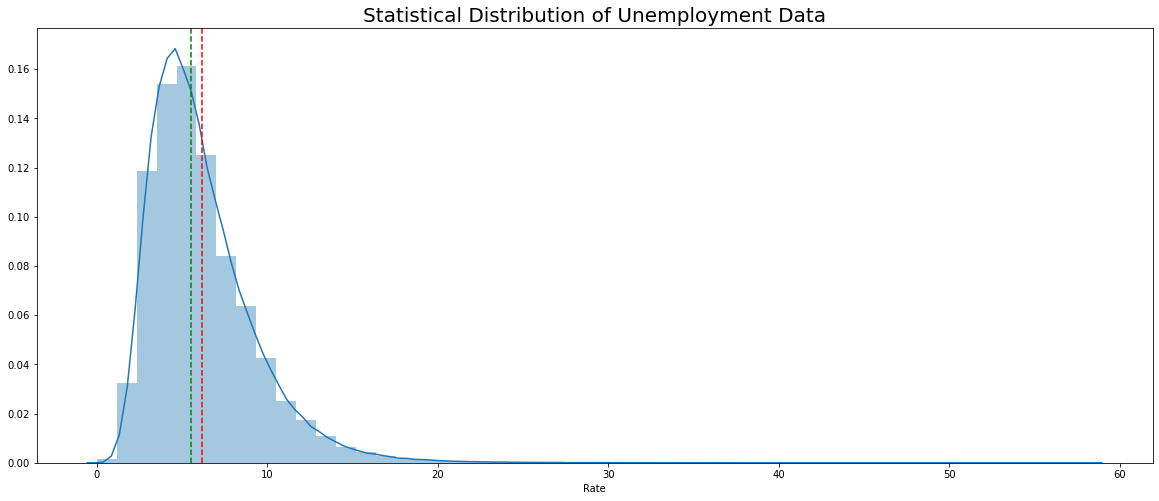

In [35]:
fig = plt.figure(figsize=(20, 8))
sns.distplot(df['Rate'])

# indicate mean and median of the distribution
plt.axvline(df['Rate'].mean(), color='r', linestyle='--')
plt.axvline(df['Rate'].median(), color='g', linestyle='--')
plt.title('Statistical Distribution of Unemployment Data', size=20)

The Seaborn plot shows a better distribution. <br/>
Data is right-skewed with a very long tail, with the mean greater than the median

#### Analysis using the categorical columns

In [36]:
from statsmodels.graphics.factorplots import interaction_plot
state = df['State'] 
rate = df['Rate']
year = df['Year']
month = df['Month']

##### Month

In [37]:
# inspect Month column
df['Month'].unique()

array(['February', 'October', 'March', 'August', 'May', 'January', 'June',
       'September', 'April', 'December', 'July', 'November'], dtype=object)

Text(0.5, 1.0, 'Quantity of Available Unemployment Data by Month')

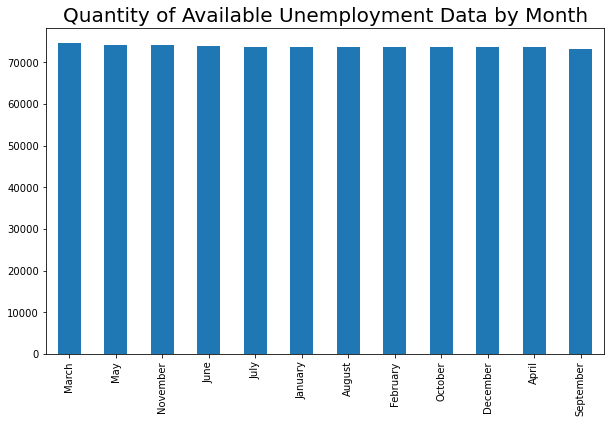

In [38]:
# Visualise Count of data for Months
df['Month'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Quantity of Available Unemployment Data by Month', size=20) 

The quantity of data for each month seems to be evenly distributed. <br/>
However, March is slightly higher than the others, and September the lowest.

##### How much does Month affect the Unemployment rate?

Text(0.5, 1.0, 'Average Unemployment Rate by State per Month')

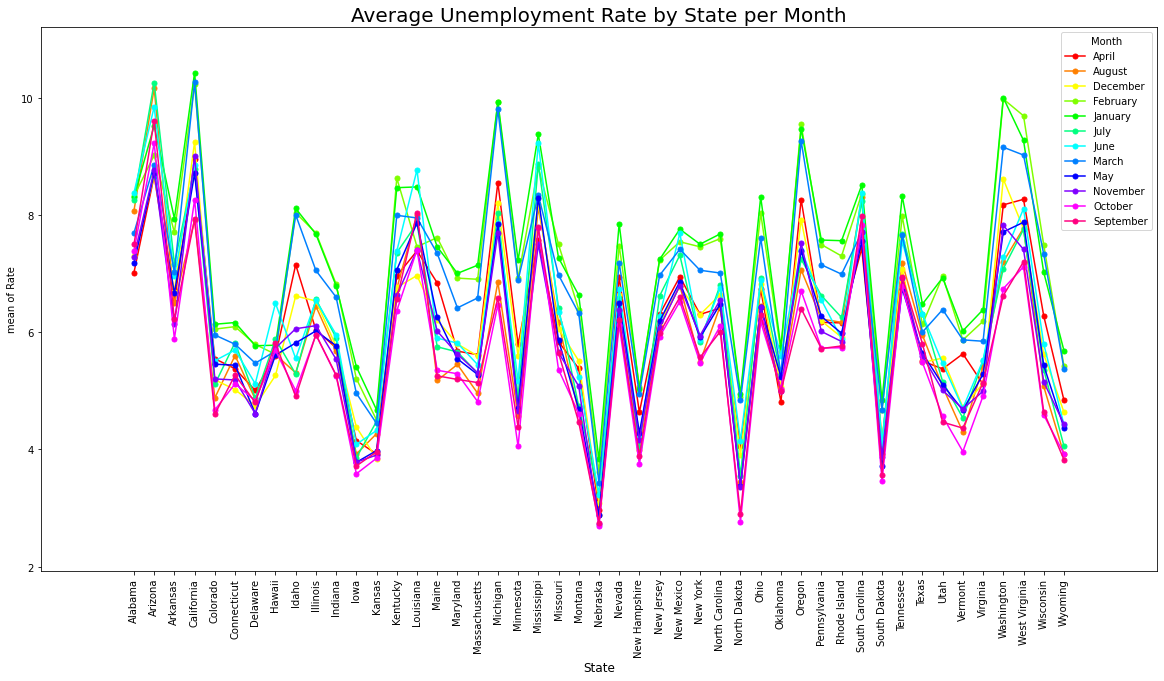

In [95]:
# Go Deeper
fig, ax = plt.subplots(figsize=(20, 10))
fig = interaction_plot(x=state, trace=month, response=rate, ms=10, ax=ax)
plt.xticks(rotation=90) # rotate the x-axis labels
ax.set_xlabel('State', fontsize=12)
plt.title('Average Unemployment Rate by State per Month', size=20) 


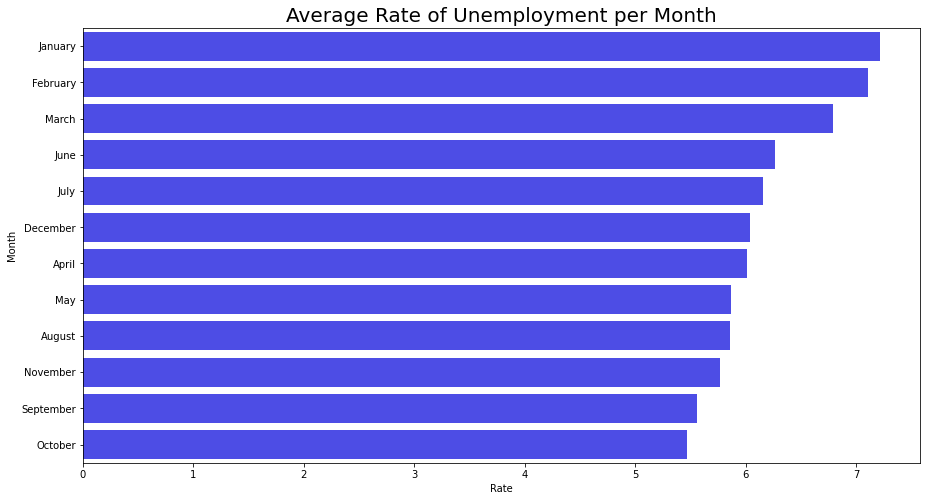

In [40]:
fig = plt.figure(figsize=(15, 8))
plt.title('Average Rate of Unemployment per Month', size=20)

grp_order = df.groupby('Month').Rate.agg('mean').sort_values(ascending=False).index 
sns.barplot(x='Rate', y='Month', data=df, ci=0, color='blue', alpha=0.8, estimator=np.mean, order=grp_order)

The data shows that rate of unemployment in the USA is highest for most states between January to March for most US States, and lowest September to November. <br/>
Economic growth, employment contracts, and many other factors not accounted for here, may be the causes of this overall trend.

##### Year

In [41]:
# inspect Year column
df['Year'].unique()

array([2015, 2014, 2016, 2011, 2010, 2013, 2012, 1991, 1990, 1993, 1992,
       1995, 1994, 1997, 1996, 1999, 1998, 2002, 2003, 2000, 2001, 2006,
       2007, 2004, 2005, 2008, 2009])

Text(0.5, 1.0, 'Quantity of Available Unemployment Data by Year')

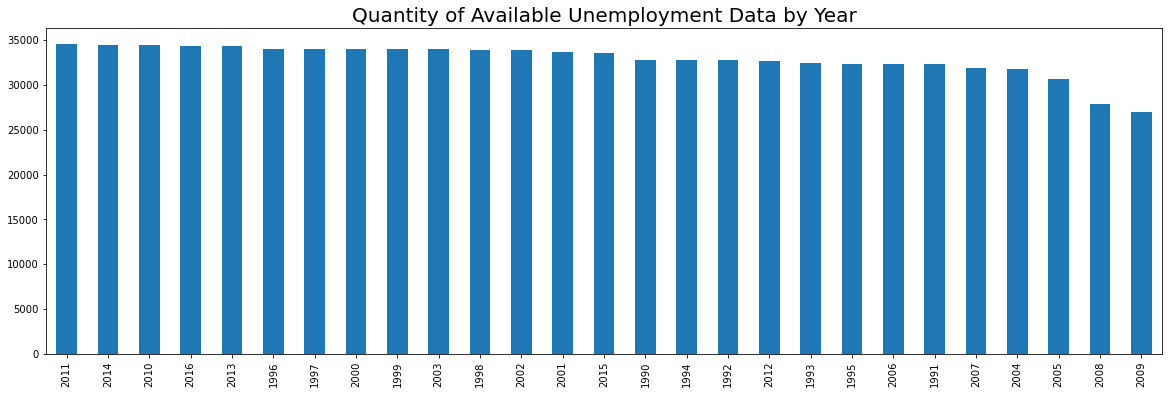

In [42]:
# Visualise count of the Year column
df['Year'].value_counts().plot(kind='bar', figsize=(20,6))
plt.title('Quantity of Available Unemployment Data by Year', size=20) 

2011 has the highest quantity of data in this dataset, and 2009 the lowest. <br/>
The difference between 2011 and 2009 is almost 10,000. <br/>
It does not seem to have been caused by an improvement in umemployment data collection as even 1997 has significantly higher quantity of data than 2009.

Text(0.5, 1.0, 'Average Unemployment Rate by State per Year')

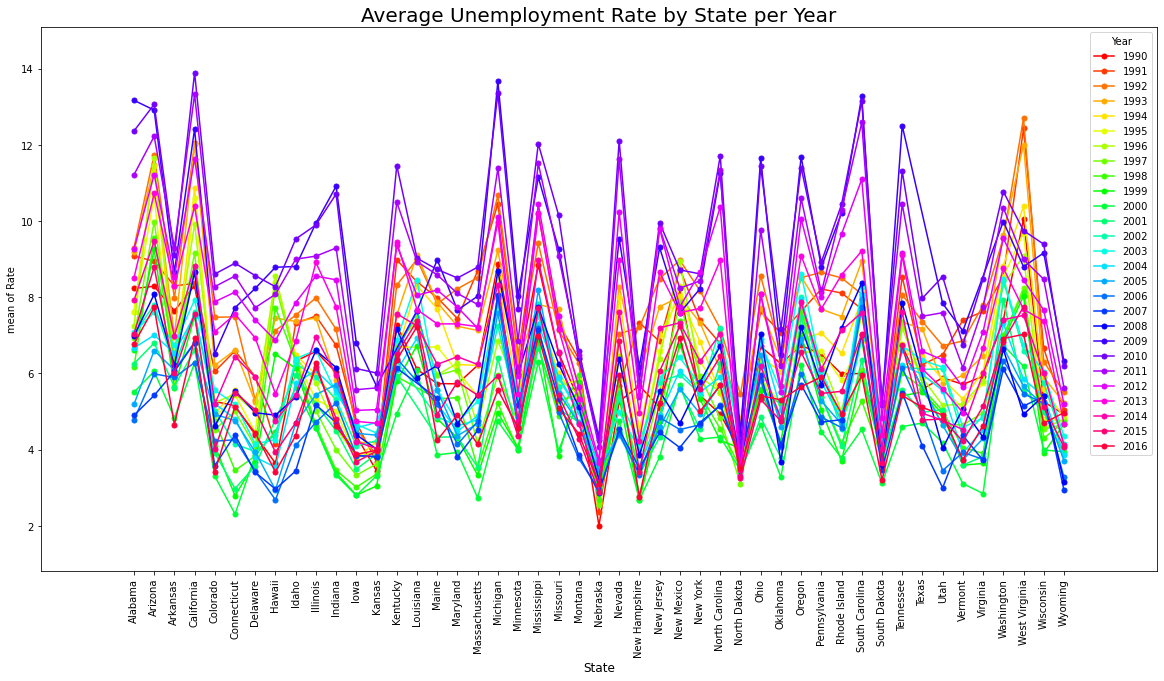

In [97]:
# Go Deeper
fig, ax = plt.subplots(figsize=(20, 10))
fig = interaction_plot(x=state, trace=year, response=rate, ms=10, ax=ax)
plt.xticks(rotation=90) # rotate the x-axis labels
ax.set_xlabel('State', fontsize=12)
plt.title('Average Unemployment Rate by State per Year', size=20) 

USA states have experienced varying degrees of unemployment over the years - 1990 to 2016; and the recession was not kind to many <br/>
Unemployment rates in the US was clearly at its highest in 2009-2010, except West Virginia which experienced its highest rates in 1992. <br/>
However, West Virginia was also hit by the recession, and had its best years right before the recession, and is still yet to return to that past glory. <br/>
Many States seemed to still be recovering from the recession, and for states like Connecticut, Massachusetts, Oklahoma, Virginia, Wyoming, and many others, their best years were many years ago. <br/>
Nebraska is shown to have had its lowest unemployment rates in 2016. <br/>
Alabama's best days were still yet to come; so also Illinois, New Mexico, Oregon, Utah and Wyoming. <br/>
Hawaii is seen not to have done badly at all during the recession. <br/>
<br/> 
Overall, Nebraska, South Dakota, and North Dakota seems to have been doing well generally, with very little variance in unemployment rate over the exhibited years. <br/>
However, this is not a stamp of economic growth or buoyance either as data for those two factors are not examined here <br/>
Factors such as population,and migration may have had a huge role to play too, in the variance of unemployment rates in the states over the years. <br/>

More analysis must be done to analysis the extent of magnitude of the impact of the recession on each state.

#### Counties

In [44]:
# inspect County column
df['County'].nunique()

1752

There are about 1752 Counties in this dataset

#### States

In [45]:
df['State'].nunique()

47

There are 47 States in this dataset

Text(0.5, 1.0, 'Quantity of Available Unemployment Data by State')

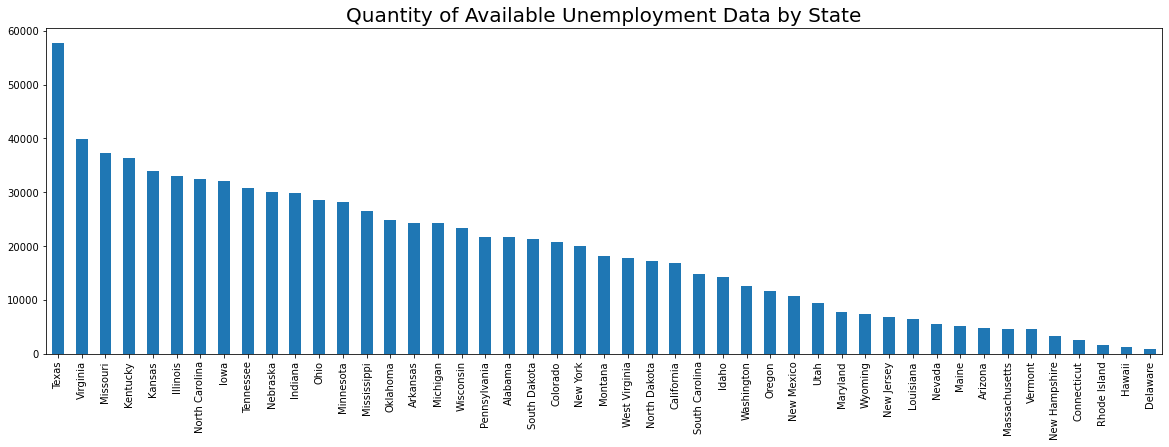

In [46]:
# Visualise the State column
df['State'].value_counts().plot(kind='bar', figsize=(20,6))
plt.title('Quantity of Available Unemployment Data by State', size=20) 

Texas has the most amount of data in this dataset, with Delaware having very little

Text(0.5, 1.0, 'Distribution of Unemployment Rates by State')

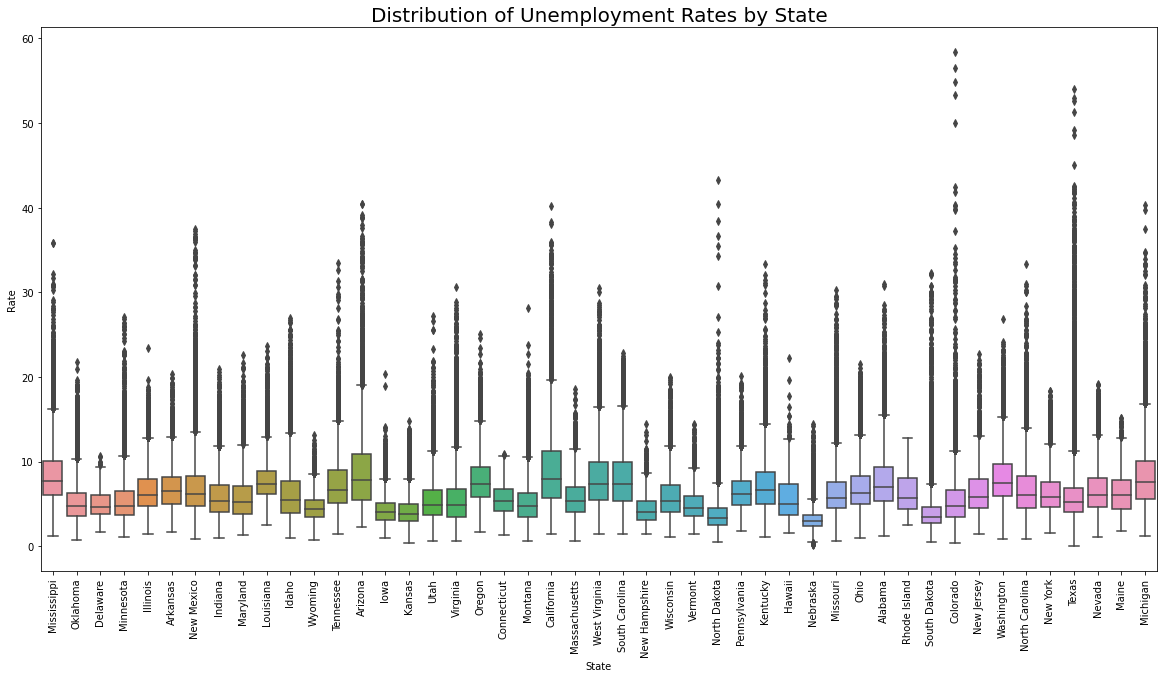

In [47]:
# Check distribution of each state's data
fig = plt.figure(figsize=(20, 10))
plt.xticks(rotation=90) # rotate the x-axis labels
sns.boxplot(x='State', y='Rate', data=df)
plt.title('Distribution of Unemployment Rates by State', size=20) 

It can be clearly seen from this distribution above that:
1. Colorado and Texas have the highest dimension of the outliers of the dataset
2. While the magnitudes of the minimum unemployment rates are close, the disparity in the maximum rates can easily be seen to be high, with a few states having a wide variance of distribution.

In [48]:
# inspect the data summary by state
df.groupby(by=['State']).describe()

Year                                                 \
                  count         mean       std     min     25%     50%   
State                                                                    
Alabama         21708.0  2003.000000  7.789060  1990.0  1996.0  2003.0   
Arizona          4860.0  2003.000000  7.789682  1990.0  1996.0  2003.0   
Arkansas        24300.0  2003.000000  7.789041  1990.0  1996.0  2003.0   
California      16878.0  2002.982818  7.393193  1990.0  1997.0  2003.0   
Colorado        20736.0  2003.000000  7.789069  1990.0  1996.0  2003.0   
Connecticut      2592.0  2003.000000  7.790384  1990.0  1996.0  2003.0   
Delaware          972.0  2003.000000  7.792891  1990.0  1996.0  2003.0   
Hawaii           1296.0  2003.000000  7.791888  1990.0  1996.0  2003.0   
Idaho           14256.0  2003.000000  7.789154  1990.0  1996.0  2003.0   
Illinois        33048.0  2003.000000  7.788999  1990.0  1996.0  2003.0   
Indiana         29808.0  2003.000000  7.789012  1990.0  1996.0  2003.0   
Iowa            32076.0  2003.000000  7.789002  1990.0  1996.0  2003.0   
Kansas          34020.0  2003.000000  7.788995  1990.0  1996.0  2003.0   
Kentucky        36360.0  2002.613861  7.909209  1990.0  1996.0  2002.0   
Louisiana        6464.0  2008.663366  7.415139  1990.0  2008.0  2011.0   
Maine            5184.0  2003.000000  7.789632  1990.0  1996.0  2003.0   
Maryland         7776.0  2003.000000  7.789382  1990.0  1996.0  2003.0   
Massachusetts    4536.0  2003.000000  7.789740  1990.0  1996.0  2003.0   
Michigan        24236.0  2002.133562  7.660273  1990.0  1996.0  2002.0   
Minnesota       28188.0  2003.000000  7.789019  1990.0  1996.0  2003.0   
Mississippi     26568.0  2003.000000  7.789028  1990.0  1996.0  2003.0   
Missouri        37260.0  2003.000000  7.788985  1990.0  1996.0  2003.0   
Montana         18144.0  2003.000000  7.789096  1990.0  1996.0  2003.0   
Nebraska        30132.0  2003.000000  7.789010  1990.0  1996.0  2003.0   
Nevada           5508.0  2003.000000  7.789588  1990.0  1996.0  2003.0   
New Hampshire    3240.0  2003.000000  7.790083  1990.0  1996.0  2003.0   
New Jersey       6804.0  2003.000000  7.789453  1990.0  1996.0  2003.0   
New Mexico      10692.0  2003.000000  7.789245  1990.0  1996.0  2003.0   
New York        20088.0  2003.000000  7.789075  1990.0  1996.0  2003.0   
North Carolina  32400.0  2003.000000  7.789001  1990.0  1996.0  2003.0   
North Dakota    17172.0  2003.000000  7.789108  1990.0  1996.0  2003.0   
Ohio            28512.0  2003.000000  7.789018  1990.0  1996.0  2003.0   
Oklahoma        24948.0  2003.000000  7.789037  1990.0  1996.0  2003.0   
Oregon          11664.0  2003.000000  7.789215  1990.0  1996.0  2003.0   
Pennsylvania    21708.0  2003.000000  7.789060  1990.0  1996.0  2003.0   
Rhode Island     1620.0  2003.000000  7.791286  1990.0  1996.0  2003.0   
South Carolina  14904.0  2003.000000  7.789142  1990.0  1996.0  2003.0   
South Dakota    21384.0  2003.000000  7.789063  1990.0  1996.0  2003.0   
Tennessee       30780.0  2003.000000  7.789007  1990.0  1996.0  2003.0   
Texas           57658.0  2003.268722  8.093307  1990.0  1997.0  2002.0   
Utah             9396.0  2003.000000  7.789295  1990.0  1996.0  2003.0   
Vermont          4536.0  2003.000000  7.789740  1990.0  1996.0  2003.0   
Virginia        39900.0  2002.580000  7.940100  1990.0  1996.0  2002.0   
Washington      12636.0  2003.000000  7.789189  1990.0  1996.0  2003.0   
West Virginia   17820.0  2003.000000  7.789100  1990.0  1996.0  2003.0   
Wisconsin       23328.0  2003.000000  7.789048  1990.0  1996.0  2003.0   
Wyoming          7452.0  2003.000000  7.789404  1990.0  1996.0  2003.0   

                                    Rate                                     \
                    75%     max    count      mean       std  min  25%  50%   
State                                                                         
Alabama         2010.00  2016.0  21708.0  7.723844  3.432191  1.2  5.3  7.0   
Ar

The above summary shows the highest unemployment rate to be in colorado - a significant outlier. <br/>
The lowest spread is seen in Rhode Island with a maximum rate of 12.8, followed by Wyoming

##### Create a new date_time column with Year and Month

In [49]:
# using date-time function
df['Date'] = pd.to_datetime(df['Year'].astype(str)  + df['Month'], format='%Y%B') # using the first day - 01

In [50]:
df.head(3)

,Year,Month,State,County,Rate,Date
0,2015,February,Mississippi,Newton County,6.1,2015-02-01
1,2015,February,Mississippi,Panola County,9.4,2015-02-01
2,2015,February,Mississippi,Monroe County,7.9,2015-02-01


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Year    885548 non-null  int64         
 1   Month   885548 non-null  object        
 2   State   885548 non-null  object        
 3   County  885548 non-null  object        
 4   Rate    885548 non-null  float64       
 5   Date    885548 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 40.5+ MB


In [52]:
# create new dataframe with Date column as index
df_datetime = df.set_index('Date') 

In [53]:
df_datetime.head(3)

,Year,Month,State,County,Rate
Date,,,,,
2015-02-01,2015,February,Mississippi,Newton County,6.1
2015-02-01,2015,February,Mississippi,Panola County,9.4
2015-02-01,2015,February,Mississippi,Monroe County,7.9


In [54]:
# check the featured months from 1990
df_datetime[df_datetime['Year']==1990]['Month'].unique() 

array(['February', 'October', 'March', 'August', 'May', 'January', 'June',
       'September', 'April', 'December', 'July', 'November'], dtype=object)

### Analyse on the Entire USA

In [55]:
# create a new dataframe pivoted to show the average rate per year for each state
df_agg_US = pd.pivot_table(df_datetime, values='Rate', index=['Date'], columns='State', aggfunc='mean')
df_agg_US.head(5)

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Hawaii,Idaho,Illinois,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,8.692537,8.540000,8.373333,9.306897,6.521875,5.4500,3.966667,3.875,7.813636,7.774510,...,5.037879,7.412632,6.203543,7.479310,6.207143,6.463158,9.287179,10.818182,6.327778,6.513043
1990-02-01,8.971642,8.333333,8.510667,9.308621,6.332812,5.4250,4.500000,3.650,7.929545,8.297059,...,4.690909,7.005263,NaN,7.596552,6.314286,6.015038,9.884615,10.750909,6.909722,6.517391
1990-03-01,8.408955,7.893333,7.849333,8.991379,6.090625,5.1125,4.033333,3.825,8.552273,7.231373,...,4.810606,6.226316,5.832677,6.931034,6.528571,5.607519,8.715385,9.689091,6.763889,6.243478
1990-04-01,7.488060,7.620000,7.582667,8.106897,5.701562,4.9625,3.633333,3.950,7.563636,6.309804,...,4.004545,6.397895,NaN,6.193103,6.264286,5.054887,7.276923,9.454545,5.658333,5.230435
1990-05-01,7.343284,7.480000,7.474667,7.403448,5.839063,4.9375,3.166667,3.850,5.802273,5.824510,...,3.984848,6.218947,5.689764,5.468966,5.557143,5.230827,6.753846,8.976364,4.494444,4.500000


In [56]:
# compute aggregates of unemployment rate of the USA for each month of each year 
df_agg_US['Mean_Rate'] = df_agg_US.mean(axis=1) # mean
df_agg_US['Min_Rate'] = df_agg_US.min(axis=1) # minimum
df_agg_US['Max_Rate'] = df_agg_US.max(axis=1) # maximum

In [57]:
df_agg_US.head(5)

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Hawaii,Idaho,Illinois,...,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Mean_Rate,Min_Rate,Max_Rate
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,8.692537,8.540000,8.373333,9.306897,6.521875,5.4500,3.966667,3.875,7.813636,7.774510,...,7.479310,6.207143,6.463158,9.287179,10.818182,6.327778,6.513043,6.944985,2.954839,10.818182
1990-02-01,8.971642,8.333333,8.510667,9.308621,6.332812,5.4250,4.500000,3.650,7.929545,8.297059,...,7.596552,6.314286,6.015038,9.884615,10.750909,6.909722,6.517391,6.957681,2.667742,11.124096
1990-03-01,8.408955,7.893333,7.849333,8.991379,6.090625,5.1125,4.033333,3.825,8.552273,7.231373,...,6.931034,6.528571,5.607519,8.715385,9.689091,6.763889,6.243478,6.480366,2.259140,10.653012
1990-04-01,7.488060,7.620000,7.582667,8.106897,5.701562,4.9625,3.633333,3.950,7.563636,6.309804,...,6.193103,6.264286,5.054887,7.276923,9.454545,5.658333,5.230435,5.957771,2.027957,9.477108
1990-05-01,7.343284,7.480000,7.474667,7.403448,5.839063,4.9375,3.166667,3.850,5.802273,5.824510,...,5.468966,5.557143,5.230827,6.753846,8.976364,4.494444,4.500000,5.549279,1.639785,8.976364


Text(0.5, 1.0, 'Average Unemployment Rate in the USA: 1990 - 2016')

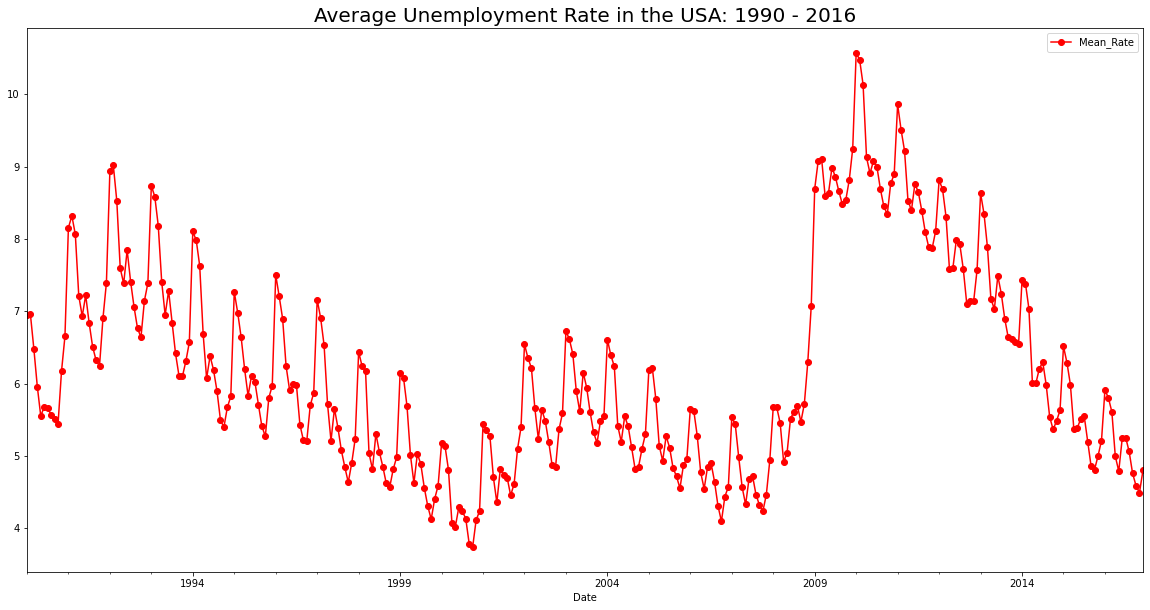

In [58]:
# Visualise unemployment data 
df_agg_US.Mean_Rate.plot(color='r', legend=True,  marker='o', figsize=(20, 10))
plt.title('Average Unemployment Rate in the USA: 1990 - 2016', size=20) # set plot title

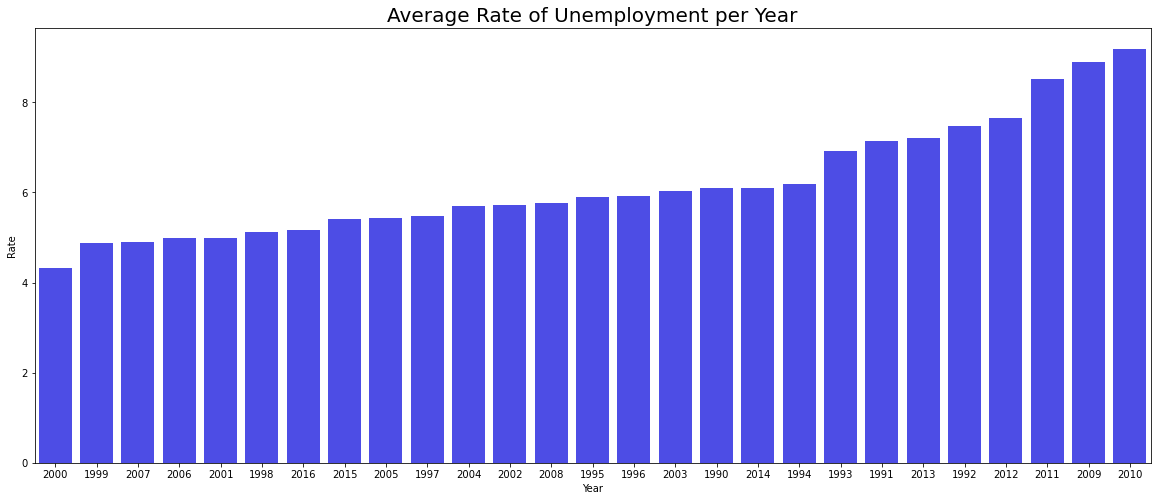

In [59]:
fig = plt.figure(figsize=(20, 8))
plt.title('Average Rate of Unemployment per Year', size=20) 

grp_order = df.groupby('Year').Rate.agg('mean').sort_values().index 
sns.barplot(x='Year', y='Rate', data=df, ci=0, color='blue', alpha=0.8, estimator=np.mean, order=grp_order)

Text(0.5, 1.0, 'Average Unemployment Rate per Year by State')

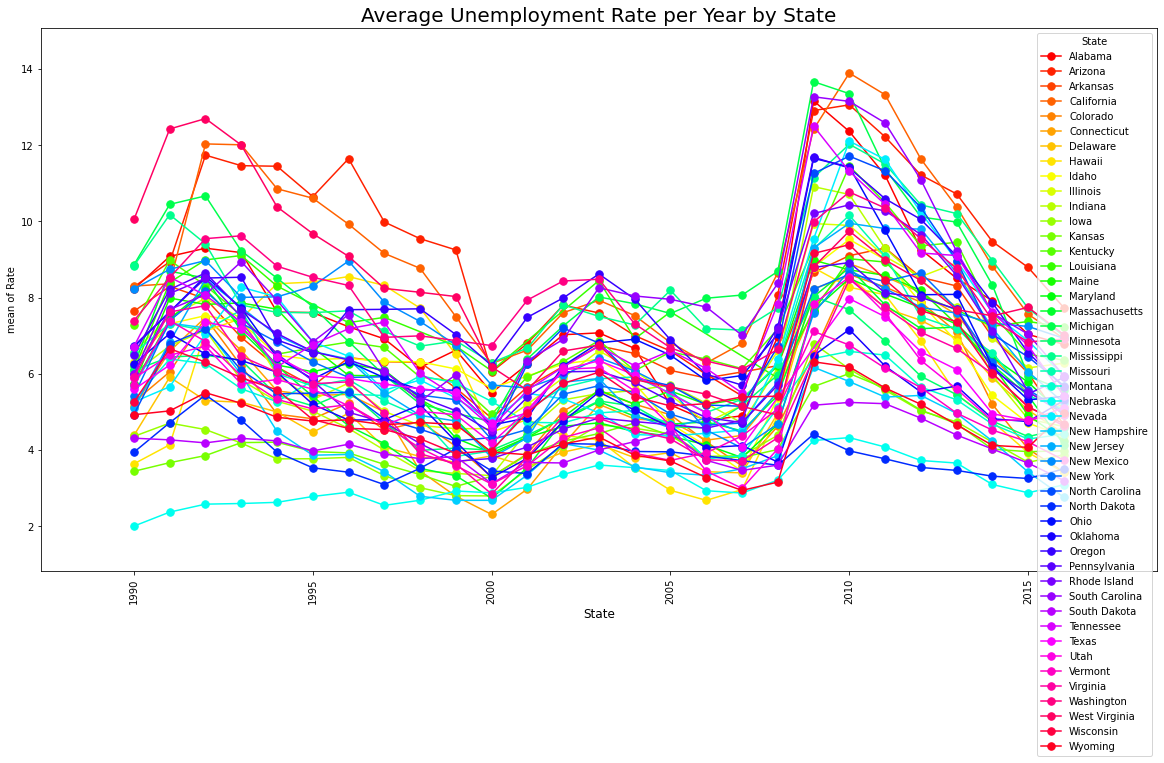

In [60]:
# Go Deeper
fig, ax = plt.subplots(figsize=(20, 10))
fig = interaction_plot(x=year, trace=state, response=rate, ms=15, ax=ax)
plt.xticks(rotation=90) # rotate the x-axis labels
ax.set_xlabel('State', fontsize=12)
plt.title('Average Unemployment Rate per Year by State', size=20) 

There is visible trend and seasonality in this data.

According to Wikipedia, the Great Recession occurred in the U.S.A. from Q3 2008 - Q2 2009; 12 months (July 2008 to June 2009) <br/>
There is a visible spike around the Great Recession period; no state seems to be an outlier <br/>
As at 2016, the US economy does not seem to have recovered to its best years around year 2000. <br/>
There also seems to be a pattern to the data, thus further investigation would be carried out. <br/>
<br/>
The second plot shows that the recession truly started in 2007 before it had its big impact in 2008-2009. <br/>
For some states, the impact of the recession continued on till 2010. Thankfully, there is a generally improvement by 2011.<br/>
It also shows that if not for the recession, the states were on their way to very low rates of unemployment, with a truly less variance across states than in 1990.

Text(0.5, 1.0, 'Average Unemployment Rate in the USA: 1990 - 2016 (vis-a-vis the Great Recession)')

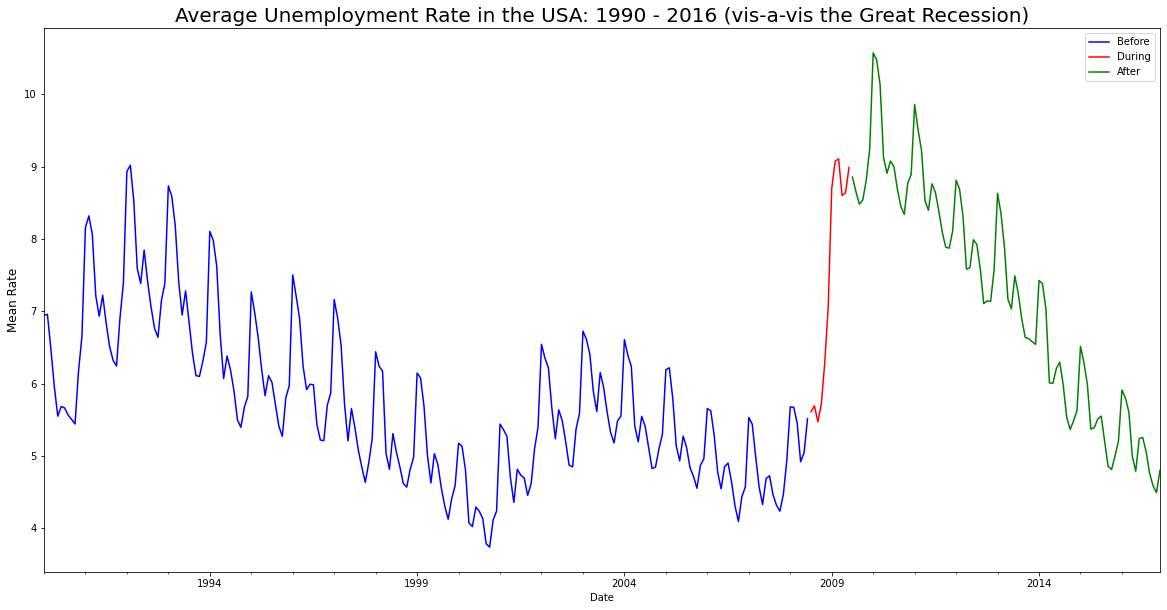

In [61]:
fig = plt.figure(figsize=(20, 10))

df_agg_US.loc['19900101':'20080601'].Mean_Rate.plot(color='blue', label='Before') # before
df_agg_US.loc['20080701':'20090601'].Mean_Rate.plot(color='red', label='During') # during
df_agg_US.loc['20090701':'20161201'].Mean_Rate.plot(color='green', label='After') # after

# set legends
plt.legend().get_texts()[0].set_text('Before')
plt.legend().get_texts()[1].set_text('During')
plt.legend().get_texts()[2].set_text('After')

# set plot title
plt.ylabel('Mean Rate', fontsize=12)
plt.title('Average Unemployment Rate in the USA: 1990 - 2016 (vis-a-vis the Great Recession)', size=20) 

##### Check out states

Text(0.5, 1.0, 'Average Unemployment Rate in Alabama: 1990 - 2016')

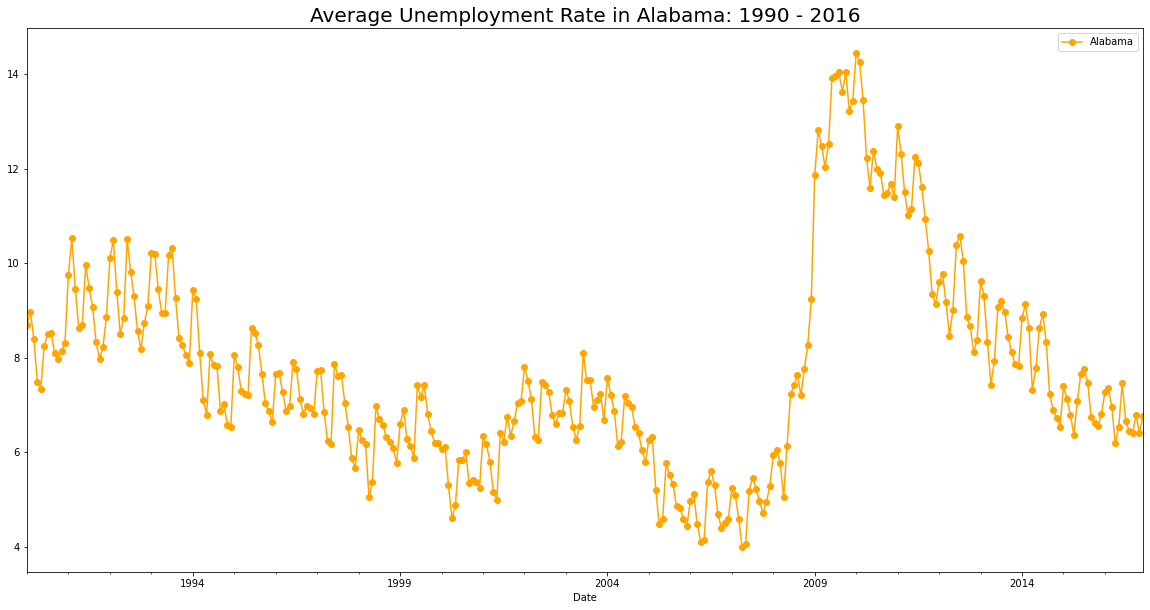

In [62]:
# Visualise unemployment data for a high variance state
df_agg_US.Alabama.plot(color='orange', legend=True,  marker='o', figsize=(20, 10))
plt.title('Average Unemployment Rate in Alabama: 1990 - 2016', size=20) # set plot title

Text(0.5, 1.0, 'Average Unemployment Rate in Nebraska: 1990 - 2016')

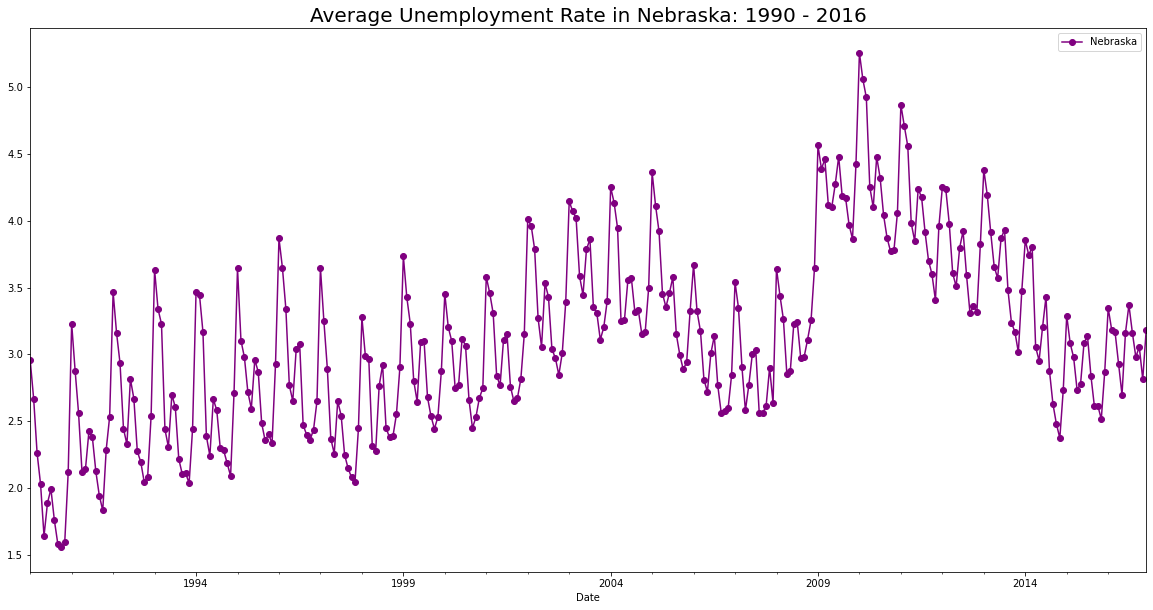

In [63]:
# Visualise unemployment data for a low variance state
df_agg_US.Nebraska.plot(color='purple', legend=True, marker='o', figsize=(20, 10))
plt.title('Average Unemployment Rate in Nebraska: 1990 - 2016', size=20) # set plot title

### Going Deeper: Trends

Text(0.5, 1.0, 'Average Unemployment Rate in the USA: 1990')

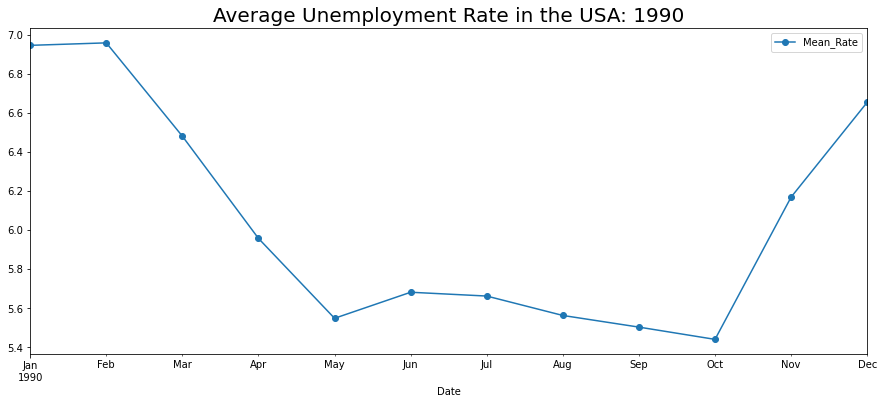

In [64]:
# 1990 
df_agg_US.loc['19900101':'19901201'].Mean_Rate.plot(legend=True, marker='o', figsize=(15, 6))
plt.title('Average Unemployment Rate in the USA: 1990', size=20) 

In [65]:
#df_datetime.loc['19900101':'19901201'].groupby(['State']).Rate.plot(kind='scatter', legend=True)

In [66]:
# TEMPLATE
#df_agg.Wyoming.resample('W').mean().plot(color='r', legend=True)

### Going Deeper: possible Cause-Effect of Recession on Unemployment Rate 

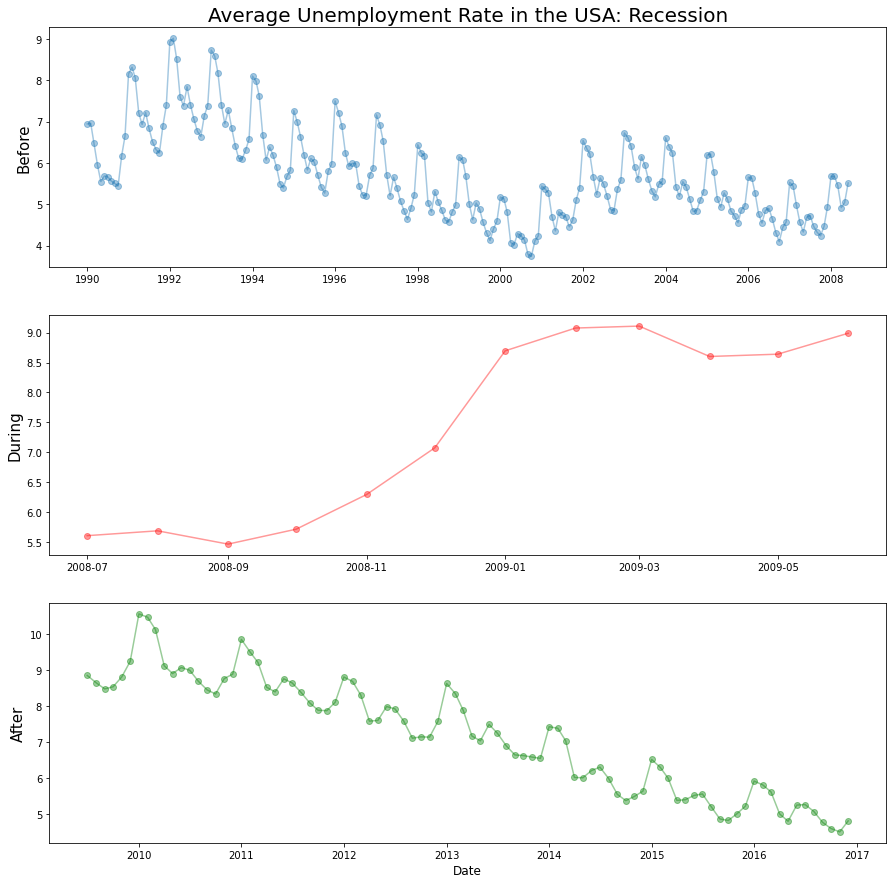

<Figure size 1440x720 with 0 Axes>

In [67]:
# Visualise to see possible effect of Recession

fig, axs = plt.subplots(3, 1, figsize=(15,15))


# Title
axs[0].set_title('Average Unemployment Rate in the USA: Recession', size = 20)

# Plots
axs[0].plot(df_agg_US.loc['19900101':'20080601'].Mean_Rate, marker='o', alpha=0.4)
axs[1].plot(df_agg_US.loc['20080701':'20090601'].Mean_Rate, color='red', marker='o',  alpha=0.4)
axs[2].plot(df_agg_US.loc['20090701':'20161201'].Mean_Rate, color='green', marker='o',  alpha=0.4)

# y labels
axs[0].set_ylabel('Before', fontsize=15)
axs[1].set_ylabel('During', fontsize=15)
axs[2].set_ylabel('After', fontsize=15)

# x label
axs[2].set_xlabel('Date', fontsize=12)

#fig.tight_layout()
plt.figure(figsize=(20, 10))
plt.show()

Generally, the economy seems to have fared well in 2001 with the lowest average unemployment rate. <br/>
Significant increase in unemployment rate is seen from November 2008 after the Recession had hit in July 2008, even surpassing the previous high of 1992. <br/>
The negative effects of the Great Recession on Unemployment is seen to begin reducing around 2011.

In [68]:
#fig = plt.figure(figsize=(20, 10))

The above plot clearly shows that for each s

In [69]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#seasonal_decompose(series, model='additive', freq=1).plot()

In [70]:
# create a new dataframe pivoted to show the average rate per state for each year
df_agg_states = pd.pivot_table(df_datetime, values='Rate', index=['State'], columns='Date', aggfunc='mean')
df_agg_states.head(5)

Date,1990-01-01,1990-02-01,1990-03-01,1990-04-01,1990-05-01,1990-06-01,1990-07-01,1990-08-01,1990-09-01,1990-10-01,...,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01
State,,,,,,,,,,,,,,,,,,,,,
Alabama,8.692537,8.971642,8.408955,7.488060,7.343284,8.250746,8.497015,8.516418,8.111940,7.979104,...,6.949254,6.194030,6.538806,7.464179,6.668657,6.449254,6.417910,6.783582,6.410448,6.767164
Arizona,8.540000,8.333333,7.893333,7.620000,7.480000,8.920000,9.400000,9.540000,8.833333,7.980000,...,7.113333,7.613333,7.686667,8.660000,9.060000,8.533333,7.966667,7.480000,6.746667,6.686667
Arkansas,8.373333,8.510667,7.849333,7.582667,7.474667,7.584000,7.834667,7.248000,7.070667,6.834667,...,4.722667,3.962667,4.381333,4.888000,5.110667,4.496000,4.521333,3.976000,4.132000,4.560000
California,9.306897,9.308621,8.991379,8.106897,7.403448,7.262069,NaN,7.039655,7.277586,NaN,...,7.648276,6.855172,NaN,6.927586,7.046552,6.532759,6.153448,6.294828,6.441379,6.767241
Colorado,6.521875,6.332812,6.090625,5.701562,5.839063,5.276562,4.685937,4.429688,4.165625,4.189062,...,3.714063,3.814063,3.801563,4.075000,3.584375,3.303125,3.004687,3.106250,2.915625,2.834375


In [71]:
df_agg_US.head(10)

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Hawaii,Idaho,Illinois,...,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Mean_Rate,Min_Rate,Max_Rate
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,8.692537,8.540000,8.373333,9.306897,6.521875,5.4500,3.966667,3.875,7.813636,7.774510,...,7.479310,6.207143,6.463158,9.287179,10.818182,6.327778,6.513043,6.944985,2.954839,10.818182
1990-02-01,8.971642,8.333333,8.510667,9.308621,6.332812,5.4250,4.500000,3.650,7.929545,8.297059,...,7.596552,6.314286,6.015038,9.884615,10.750909,6.909722,6.517391,6.957681,2.667742,11.124096
1990-03-01,8.408955,7.893333,7.849333,8.991379,6.090625,5.1125,4.033333,3.825,8.552273,7.231373,...,6.931034,6.528571,5.607519,8.715385,9.689091,6.763889,6.243478,6.480366,2.259140,10.653012
1990-04-01,7.488060,7.620000,7.582667,8.106897,5.701562,4.9625,3.633333,3.950,7.563636,6.309804,...,6.193103,6.264286,5.054887,7.276923,9.454545,5.658333,5.230435,5.957771,2.027957,9.477108
1990-05-01,7.343284,7.480000,7.474667,7.403448,5.839063,4.9375,3.166667,3.850,5.802273,5.824510,...,5.468966,5.557143,5.230827,6.753846,8.976364,4.494444,4.500000,5.549279,1.639785,8.976364
1990-06-01,8.250746,8.920000,7.584000,7.262069,5.276562,5.1375,3.700000,4.700,5.572727,5.983333,...,5.527586,5.057143,5.240602,5.838462,9.338182,4.690278,4.386957,5.682476,1.887097,9.446341
1990-07-01,8.497015,9.400000,7.834667,NaN,4.685937,5.3125,3.466667,3.850,5.220455,5.998039,...,5.203448,4.900000,5.945865,6.064103,9.163636,4.458333,3.969565,5.662990,1.991398,9.400000
1990-08-01,8.516418,9.540000,7.248000,7.039655,4.429688,5.2000,3.966667,3.325,4.897727,6.462745,...,5.444828,4.707143,5.806015,6.256410,9.929091,4.361111,3.913043,5.563739,1.756989,9.929091
1990-09-01,8.111940,8.833333,7.070667,7.277586,4.165625,5.1125,5.266667,3.775,4.388636,6.011765,...,4.782759,4.907143,5.945865,5.628205,10.132727,4.120833,3.882609,5.504170,1.579570,10.132727


Find the Minimum and Maximum unemployment value for each state to discover the state hardest hit

In [72]:
# Slice data into new dataframes for: Before, During, and After the Recession
# use to access if column is datetime and index
df_before = df_datetime.loc['19900101':'20080601'] # before recession 
df_during = df_datetime.loc['20080701':'20090601'] # during recession
df_after = df_datetime.loc['20090701':'20161201'] # after recession

In [73]:
print('Before', df_before['Rate'].describe()) # before
print("")
print('During',df_during['Rate'].describe()) # during
print("")
print('After',df_after['Rate'].describe()) # after

Before count    606436.000000
mean          5.719002
std           2.996661
min           0.000000
25%           3.700000
50%           5.100000
75%           6.900000
max          58.400000
Name: Rate, dtype: float64

During count    27503.000000
mean         7.458386
std          3.292454
min          1.100000
25%          5.000000
50%          7.000000
75%          9.300000
max         29.800000
Name: Rate, dtype: float64

After count    251609.000000
mean          7.133809
std           3.109285
min           0.900000
25%           4.800000
50%           6.700000
75%           8.900000
max          31.900000
Name: Rate, dtype: float64


The distribution of the data vis-a-vis the Great Recession is clearly different <br/>
But generally, the country did better with a new maximum of 31.9.

Text(0.5, 1.0, 'All-time Average Unemployment Rate in the USA by States')

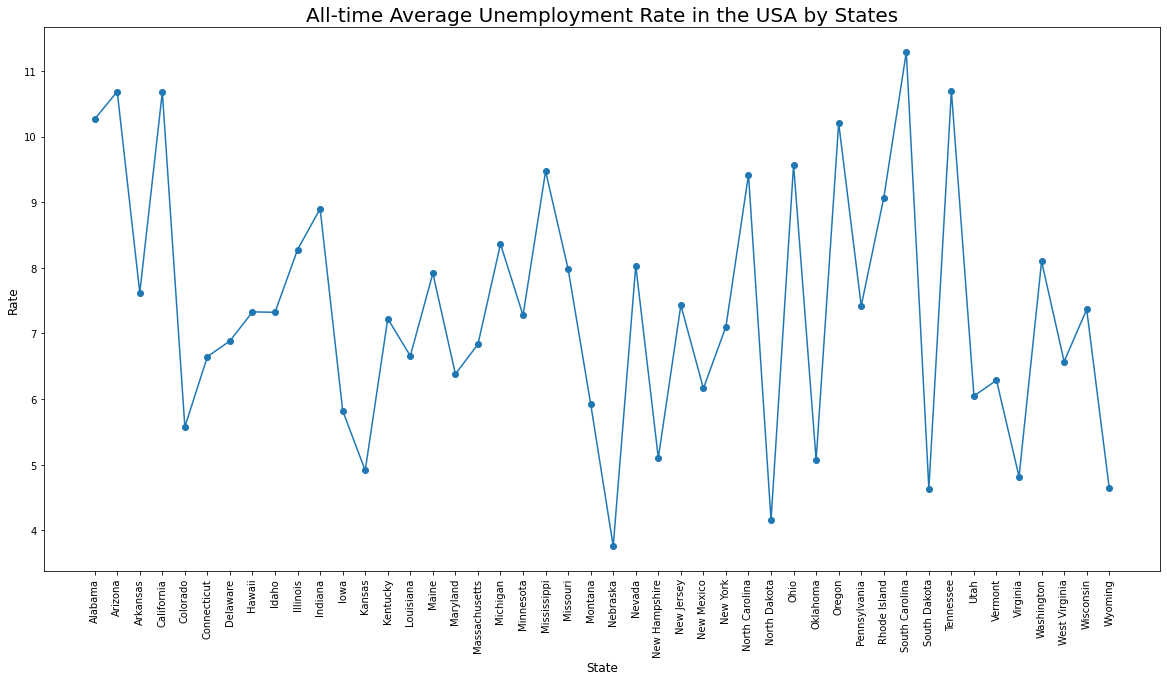

In [74]:
fig = plt.figure(figsize=(20, 10))
plt.plot(df_during.groupby(['State']).Rate.mean(), marker='o')
plt.xticks(rotation=90) # rotate the x-axis labels
plt.xlabel('State', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.title('All-time Average Unemployment Rate in the USA by States', size=20) 

Rhode Island has the highest average unemployment rate and Nebraska the lowest average

### Going Deeper: Distribution

Text(0.5, 1.0, 'Minimum, Average, and Maximum Unemployment Rate in the USA: 1990 - 2016')

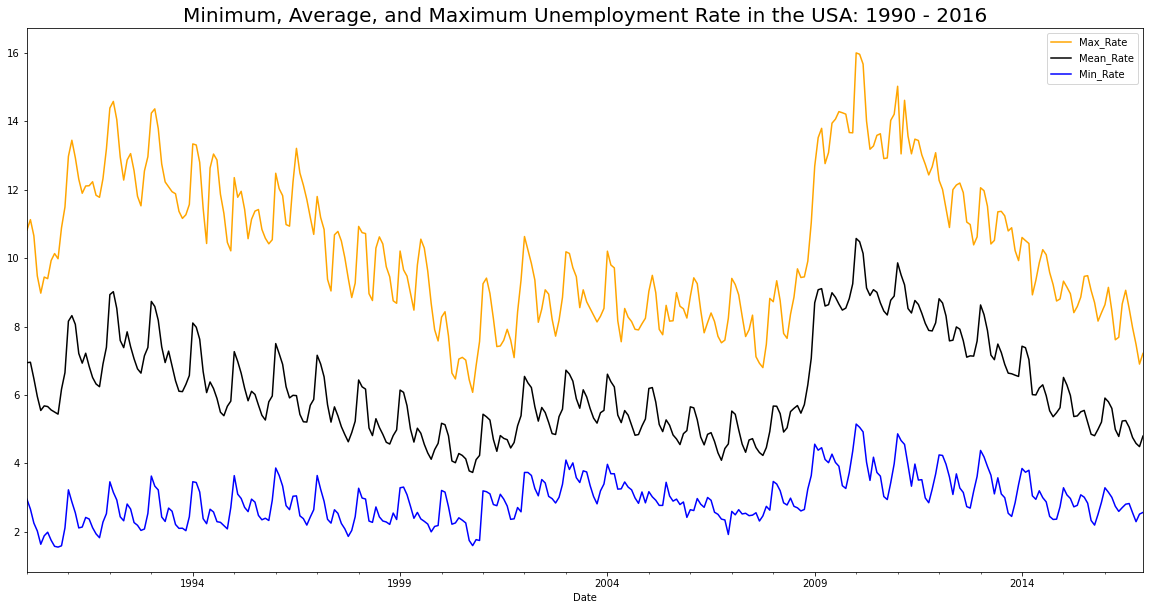

In [75]:
# Compare distribution of different magnitudes of unemployment Rate

fig = plt.figure(figsize=(20, 10)) # set figure size

df_agg_US.Max_Rate.plot(color='orange', legend=True)
df_agg_US.Mean_Rate.plot(color='black', legend=True)
df_agg_US.Min_Rate.plot(color='blue', legend=True)
plt.title('Minimum, Average, and Maximum Unemployment Rate in the USA: 1990 - 2016', size=20) # set plot title

The pattern of the data is fairly similar inspite of the magnitude <br/>
Thus, I'll conclude that the presence of the outliers does not change the data distribution <br/>
Assumption is thus made that all outliers are valid

Inspect data; before the Recession, during the Recession, and after the Recession

In [76]:
# check frame dimensions
print('Before Recession', df_before.shape) # 17.6 years
print('During Recession', df_during.shape) # 1 yr
print('After Recession', df_after.shape) # 7 yrs

Before Recession (606436, 5)
During Recession (27503, 5)
After Recession (251609, 5)


The above also shows more about the distribution of the data, with the recession period containing the least amount of data

In [77]:
# check to see if all states are present in each time frame

print('Before Recession', df_before['State'].nunique()) 
print('During Recession', df_during['State'].nunique())
print('After Recession', df_after['State'].nunique())

Before Recession 47
During Recession 46
After Recession 47


A State is missing for the data during the Recession

The records for one state is missing for the time during the recession. <br/>
Find out which state.

In [78]:
df_before[df_before.State.isin(df_during.State) == False]

,Year,Month,State,County,Rate
Date,,,,,
1991-02-01,1991,February,Texas,Carson County,4.2
1991-02-01,1991,February,Texas,Tyler County,7.5
1991-02-01,1991,February,Texas,Wilbarger County,6.0
1991-02-01,1991,February,Texas,Taylor County,5.4
1991-02-01,1991,February,Texas,Madison County,5.2
...,...,...,...,...,...
2004-01-01,2004,January,Texas,Yoakum County,5.9
2004-01-01,2004,January,Texas,Llano County,6.4
2004-01-01,2004,January,Texas,Hudspeth County,7.9


Texas is missing data for During the Recession

In [79]:
df.groupby(by=['State'])

In [80]:
#df_before = df_datetime['1990-01-01':'2008-06-01'] # use to access if column is string
#df_before = df_datetime[df_datetime['Date'] > dt.datetime(1990,1,1)] # use to access if the date column is datetime but not an index

Text(0.5, 1.0, 'Statistical Distribution of Unemployment Rate in the USA: Before, During, and After the Great Recession')

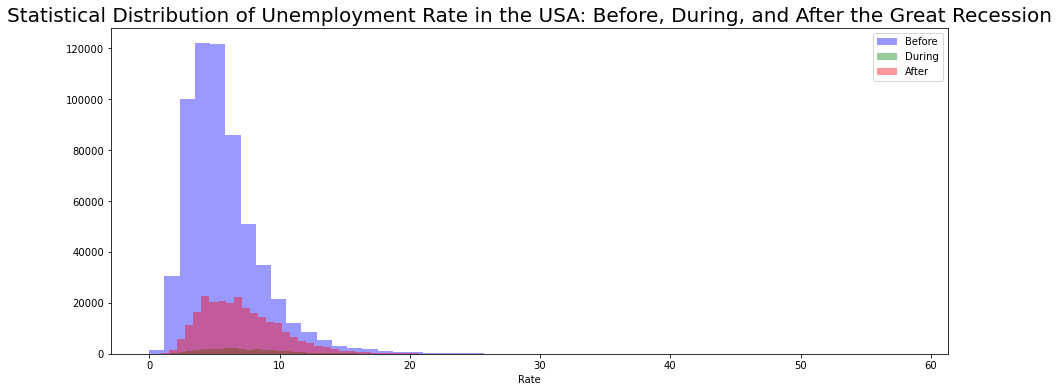

In [81]:
# DONT USE IN FINAL
fig = plt.figure(figsize=(15, 6))
sns.distplot(df_before['Rate'], kde = False, color='blue')
sns.distplot(df_during['Rate'], kde = False, color='green')
sns.distplot(df_after['Rate'], kde = False, color='red')
plt.legend(labels=['Before', 'During', 'After'])
plt.title('Statistical Distribution of Unemployment Rate in the USA: Before, During, and After the Great Recession', size=20) # set plot title

Text(0.5, 1.0, 'Statistical Distribution of Unemployment Rate in the USA: During Great Recession')

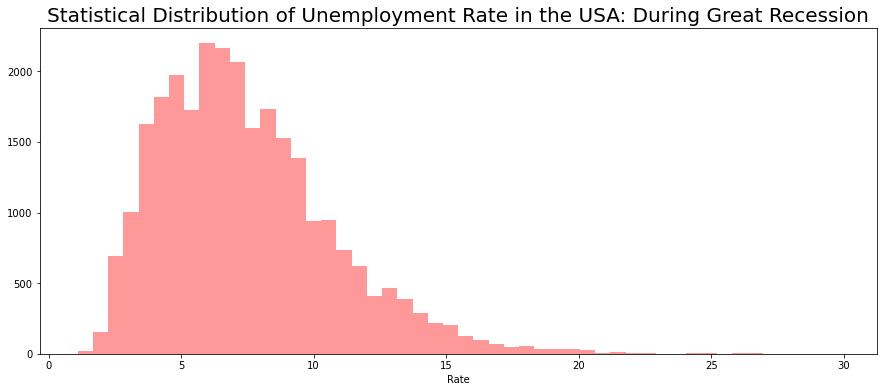

In [82]:
# During Recession
fig = plt.figure(figsize=(15, 6)) # set figure size

sns.distplot(df_during['Rate'], kde=False, color='red')
plt.title('Statistical Distribution of Unemployment Rate in the USA: During Great Recession', size=20) # set plot title

Compared to the general distribution plot above, the unemployment rate shows to have increased for many areas

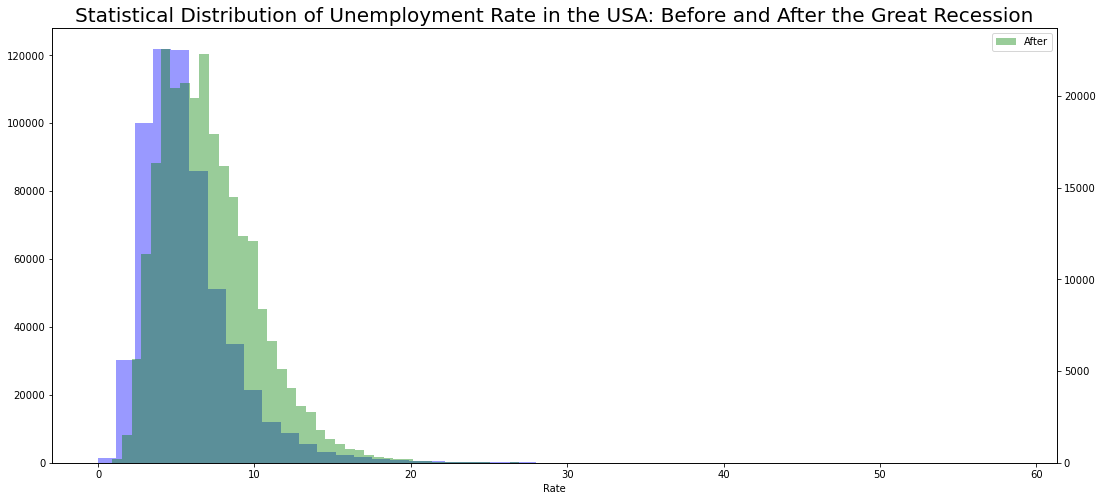

In [83]:
# compare distribution of Rate data before and after Unemployment
fig = plt.figure(figsize=(18, 8)) # set figure size

ax = sns.distplot(df_before['Rate'], kde=False, color='blue', label='Before') # Before Recession
ax2 = ax.twinx() # set second plot on first plot
sns.distplot(df_after['Rate'], ax=ax2, kde=False, color='green', label='After') # After Recession
plt.legend()
plt.title('Statistical Distribution of Unemployment Rate in the USA: Before and After the Great Recession', size=20) # set plot title
plt.show()

The plot above shows that after the recession, the graph shifted to the right, and also, more Counties now have unemployment rates between 10 and 20

The above statistics summaey shows a shift in the unemployment rate distribution during and after the recession. <br/>
Might be that the economy never truly recovered.

### Magnitude of Recession Impact OR Recession Recovery (2006 - 2016)

In [84]:
df_recovery = df[(df['Year']==2006) | (df['Year']==2016)] # during and after recession
df_recovery.head(3)

,Year,Month,State,County,Rate,Date
67924,2016,February,Mississippi,Newton County,5.9,2016-02-01
67925,2016,February,Mississippi,Panola County,8.1,2016-02-01
67926,2016,February,Mississippi,Monroe County,6.6,2016-02-01


In [85]:
df_rec_grouped = df_recovery.groupby(['State', 'Year'])['Rate'].mean().reset_index(name='mean_Rate')
df_rec_grouped.head(3)

,State,Year,mean_Rate
0,Alabama,2006,4.774378
1,Alabama,2016,6.773756
2,Arizona,2006,5.985000


In [86]:
df_rec_grouped = pd.pivot_table(df_rec_grouped, values='mean_Rate', index=['State'], columns='Year')
df_rec_grouped.head(3)

Year,2006,2016
State,,
Alabama,4.774378,6.773756
Arizona,5.985000,7.732778
Arkansas,5.891000,4.656667


In [87]:
df_rec_grouped.shape

(47, 2)

In [88]:
df_rec_grouped['difference'] = df_rec_grouped[2006] - df_rec_grouped[2016]

In [89]:
df_rec_grouped.head(5)

Year,2006,2016,difference
State,,,
Alabama,4.774378,6.773756,-1.999378
Arizona,5.985000,7.732778,-1.747778
Arkansas,5.891000,4.656667,1.234333
California,6.282615,6.920219,-0.637604
Colorado,4.217969,3.416146,0.801823


In [90]:
# Minimum
print("Minimum Values")
print(df_rec_grouped.idxmin())

print('')

# Maximum
print("Maximum Values")
print(df_rec_grouped.idxmax())

Minimum Values
Year
2006                 Hawaii
2016          New Hampshire
difference       New Mexico
dtype: object

Maximum Values
Year
2006          Michigan
2016           Arizona
difference    Michigan
dtype: object


The State with lowest Average Unemployment rate in 2006 was Hawaii. <br/>
The State with the lowest Average Unemployment rate in 2016 was New Hampshire. <br/>
<br/>
The State with the highest Average Unemployment rate in 2006 was Michigan. <br/>
The State with the highest Average Unemployment rate in 2016 was Arizona. <br/>

In [91]:
# Impact of the Great Recession
print("The State with the minimum magnitude of impact from the Recession is", df_rec_grouped['difference'].idxmin()) 
print("The State with the highest magnitude of impact from the Recession is", df_rec_grouped['difference'].idxmax()) 

The State with the minimum magnitude of impact from the Recession is New Mexico
The State with the highest magnitude of impact from the Recession is Michigan


## More Visualisations

In [92]:
df_agg_year = pd.pivot_table(df, values='Rate', index=['Year'], columns='State', aggfunc='mean')
df_agg_year.head(3)

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Hawaii,Idaho,Illinois,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1990,8.226990,8.285556,7.642222,8.303448,5.260677,5.151042,4.383333,3.637500,6.321402,6.575899,...,4.310227,6.716579,5.589469,5.883333,5.710714,5.922744,7.395085,10.051061,5.255787,4.926087
1991,9.081841,8.940556,8.295000,8.362069,6.050391,6.591667,5.911111,4.137500,7.314015,7.504085,...,4.266162,8.536140,6.230765,6.486782,7.397619,7.624185,8.527137,12.427273,6.659838,5.026812
1992,9.296891,11.739444,7.970889,12.034483,7.470964,7.483333,5.297222,7.122917,7.527083,7.982353,...,4.187247,8.063158,7.357987,6.728161,6.848214,7.788409,9.548291,12.698939,6.307523,5.504710


In [93]:
df_agg_year.shape

(27, 47)

Text(0.5, 1.0, 'Lowest and Highest hit States by the Great Recession')

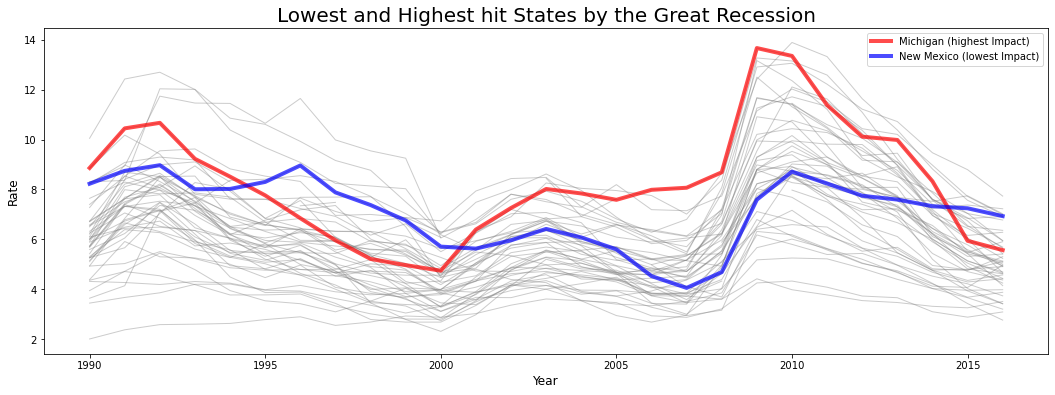

In [94]:
#df_agg_US.Max_Rate.plot(color='orange', legend=True)
#plt.plot(df_during.groupby(['State']).Rate.mean(), marker='o')

fig = plt.figure(figsize=(18, 6)) # set figure size

# highlight minimum and maximum Recession Impacts
for column in df_agg_year:
    plt.plot(df_agg_year[column], marker='', color='grey', linewidth=1, alpha=0.4)
    
    # Now re do the interesting curve, but biger with distinct color
plt.plot(df_agg_year['Michigan'], marker='', color='red', linewidth=4, alpha=0.7, label='Michigan (highest Impact)')
plt.plot(df_agg_year['New Mexico'], marker='', color='blue', linewidth=4, alpha=0.7, label='New Mexico (lowest Impact)')

# set labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate', fontsize=12)

plt.legend()
plt.title('Lowest and Highest hit States by the Great Recession', size=20) # set plot title